In [1]:
import pandas as pd
import numpy as np

#### Linear Regression with Single variable

In [24]:
income_df = pd.read_csv(r'..\JNB_data\canada_per_capita_income.csv')

In [26]:
income_df.rename(columns={"per capita income (US$)": "per_capita_income"}, inplace=True)

In [32]:
income_df.head(2)

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935


In [33]:
import matplotlib.pyplot as plt

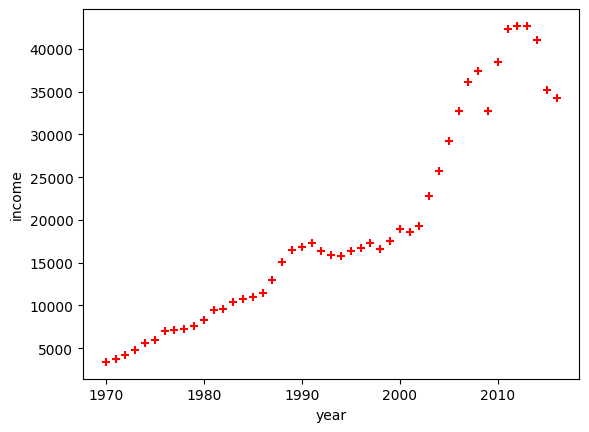

In [30]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(income_df.year, income_df.per_capita_income,color='red',marker='+')

In [51]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [35]:
model = linear_model.LinearRegression()

In [52]:
X_df = pd.DataFrame(income_df.year)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_df, income_df.per_capita_income, test_size=0.2)

In [60]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.coef_

array([808.23543978])

In [56]:
model.intercept_

-1591884.5718267406

In [61]:
model.predict([[2020]])

C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41110.17597737])

In [62]:
model.score(X_test, y_test)

0.8663455176646335

#### Linear Regression with Multi variable

In [54]:
hiring_df = pd.read_csv(r'..\JNB_data\hiring.csv')

In [55]:
hiring_df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [56]:
hiring_df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [35]:
'''ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values'''

'ValueError: Input X contains NaN.\nLinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values'

In [7]:
#there are packages which can convert words to numbers which we can use it.

In [57]:
hiring_df.experience.unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [58]:
import numpy as np
hiring_df['years_of_expr'] = pd.Series([np.nan, np.nan,5,2,7,3,10,11])

In [59]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($),years_of_expr
0,NaN,8.0,9,50000,NaN
1,NaN,8.0,6,45000,NaN
2,five,6.0,7,60000,5.0
3,two,10.0,10,65000,2.0
4,seven,9.0,6,70000,7.0
5,three,7.0,10,62000,3.0
6,ten,NaN,7,72000,10.0
7,eleven,7.0,8,80000,11.0


In [60]:
hiring_df.years_of_expr = hiring_df.years_of_expr.fillna(0.0)

In [61]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($),years_of_expr
0,NaN,8.0,9,50000,0.0
1,NaN,8.0,6,45000,0.0
2,five,6.0,7,60000,5.0
3,two,10.0,10,65000,2.0
4,seven,9.0,6,70000,7.0
5,three,7.0,10,62000,3.0
6,ten,NaN,7,72000,10.0
7,eleven,7.0,8,80000,11.0


In [74]:
import math
mean_test_score = math.floor(hiring_df['test_score(out of 10)'].mean())

In [75]:
hiring_df['test_score(out of 10)'] =  hiring_df['test_score(out of 10)'].fillna(mean_test_score)

In [76]:
hiring_salary = hiring_df['salary($)']

In [77]:
hiring_X = hiring_df.drop(['experience','salary($)'],axis=1)

In [78]:
hiring_X

,test_score(out of 10),interview_score(out of 10),years_of_expr
0,8.0,9,0.0
1,8.0,6,0.0
2,6.0,7,5.0
3,10.0,10,2.0
4,9.0,6,7.0
5,7.0,10,3.0
6,7.0,7,10.0
7,7.0,8,11.0


In [79]:
from sklearn import linear_model

In [80]:
multi_model = linear_model.LinearRegression()

In [81]:
multi_model.fit(hiring_X, hiring_salary)

LinearRegression()

In [82]:
multi_model.predict([[10,10, 12]])

C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])